# [Введение в визуализацию данных с Seaborn](https://nagornyy.me/courses/data-science/intro-to-seaborn/)

## Импорт

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Набор данных

Используется встроенный [набор данных о чаевых](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Визуализация распределения

## displot

`distplot` одновременно показывает гистограмму и график плотности распределения c `kde=True`.

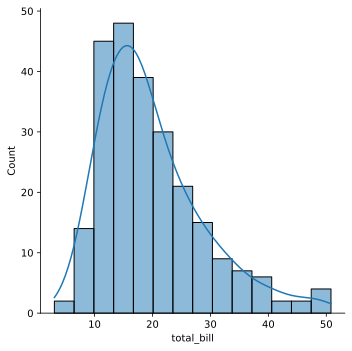

In [3]:
sns.displot(tips['total_bill'], kde=True)

Только гистограмма c `kde=False`.

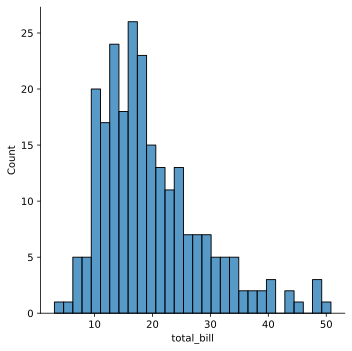

In [4]:
sns.displot(tips['total_bill'], kde=False, bins=30)

## jointplot


<p>Функция jointplot() показывает совместное распределение по двум переменным. Она имеет параметр <strong>kind</strong> который может принимать следующие значения:</p>
<ul>
<li>“scatter”</li>
<li>“reg”</li>
<li>“resid”</li>
<li>“kde”</li>
<li>“hex”</li>
</ul>
</div>

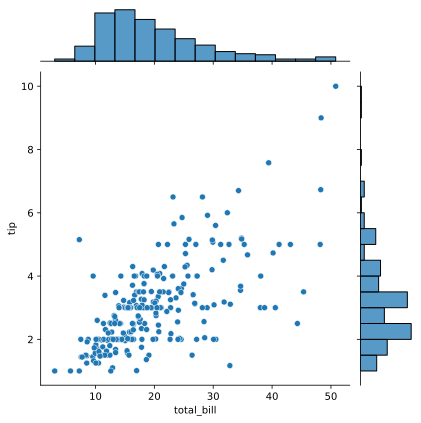

In [5]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

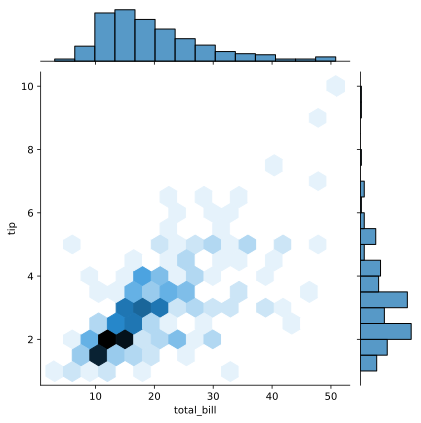

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

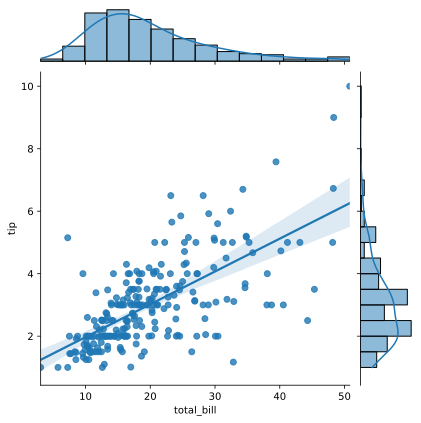

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## pairplot

`pairplot` показывает отношения между всеми парами переменных.

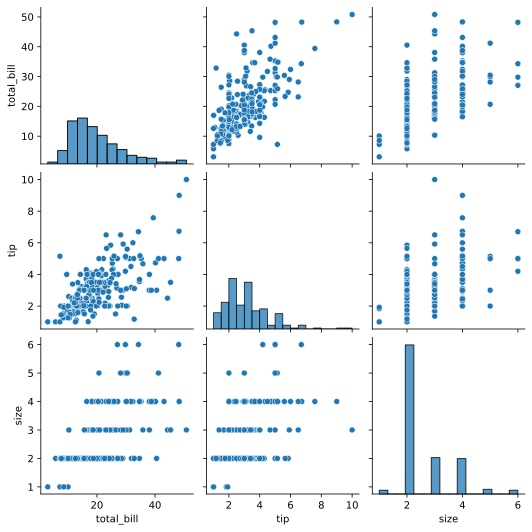

In [8]:
sns.pairplot(tips)

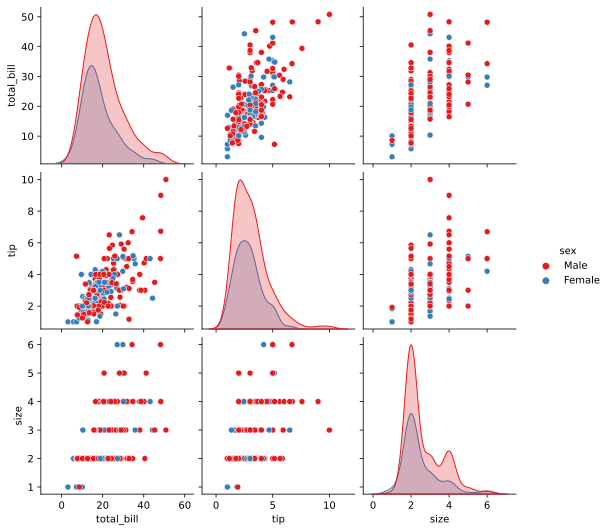

In [9]:
sns.pairplot(tips, hue='sex', palette='Set1')

По сути `pairplot` — это упрощённая версия другой функции, которая называется `PairGrid`.

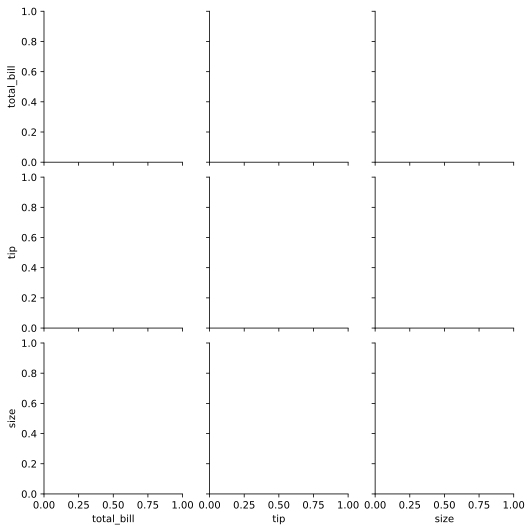

In [10]:
sns.PairGrid(tips)

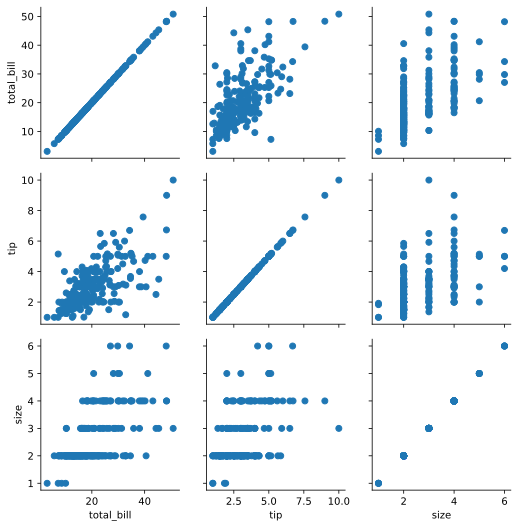

In [11]:
g = sns.PairGrid(tips)
g.map(plt.scatter)

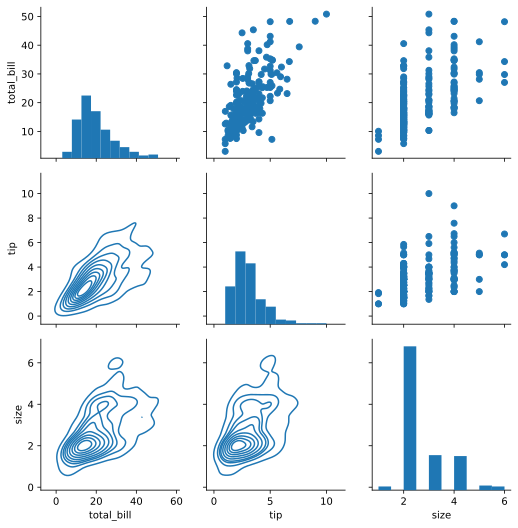

In [12]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Facet Grid

`Facet Grid` позволяет визуализировать совместное распределение отдельных признаков нескольких переменных.

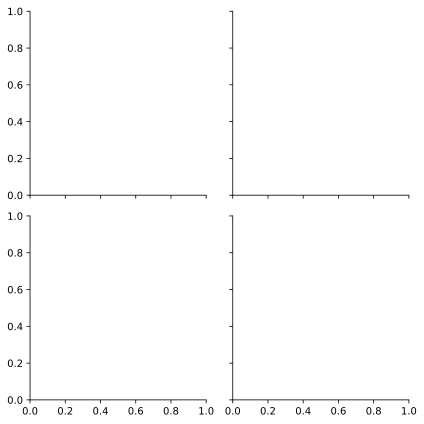

In [13]:
g = sns.FacetGrid(tips, col="time", row="smoker")

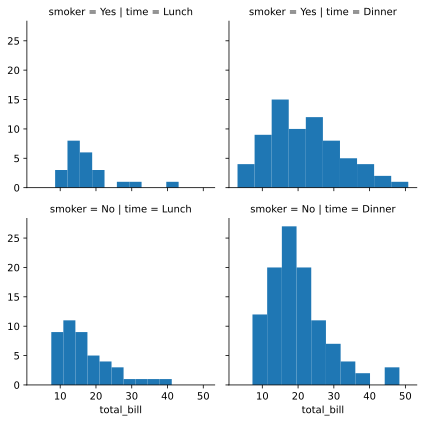

In [14]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill")

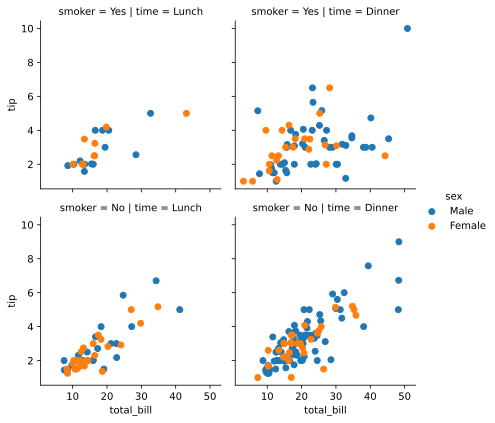

In [15]:
g = sns.FacetGrid(tips, col="time", row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## rugplot

`rugplot` показывает то же, что и график плотности распределения, только в одномерной форме. Чем плотнее расположены линии, тем выше плотность. Лучше использовать его совместно с другими видами графиков.

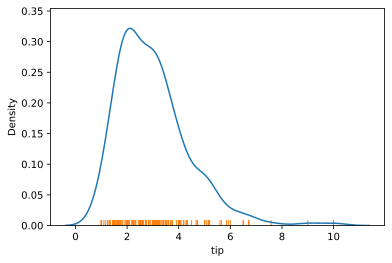

In [16]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])